# DSCI 503 - Homework 04 
### Nicholas Allen
Due February 6, 2022

In [1]:
import numpy as np, math, matplotlib.pyplot as plt

## Problem 1: Sample Mean and Variance

In [2]:
x = np.array([10, 16, 26, 12, 17, 22, 14, 12, 21, 16])
n = len(x)
mean = np.sum(x) / n
diff = x - mean 
var = np.sum(diff ** 2) / (n-1)
print(f'Sample Mean:      {mean}')
print(f'Sample Variance:  {var}')

Sample Mean:      16.6
Sample Variance:  25.6


In [3]:
mean_np = np.mean(x)
var_np = np.var(x, ddof = 1)
print(f'Sample Mean:      {mean_np}')
print(f'Sample Variance:  {var_np}')

Sample Mean:      16.6
Sample Variance:  25.6


## Problem 2: Scoring a Regression Model

In [4]:
def find_sse(true_y, pred_y):
    return np.sum((true_y - pred_y) ** 2)

In [5]:
true_y = np.array([22.1, 17.9, 16.5, 14.3, 19.8, 23.7, 22.0, 18.4, 25.7, 19.2])
pred_1 = np.array([21.4, 16.7, 17.9, 12.1, 22.1, 25.1, 21.7, 19.3, 23.4, 19.9])
pred_2= np.array([20.7, 18.1, 16.9, 13.6, 21.9, 24.8, 20.3, 21.1, 24.8, 18.4])
sse1 = find_sse(true_y, pred_1)
sse2 = find_sse(true_y, pred_2)
print(f'Model 1 SSE: {np.round(sse1,2)}')
print(f'Model 2 SSE: {round(sse2,2)}')

Model 1 SSE: 22.66
Model 2 SSE: 19.9


## Problem 3: Scoring a Classification Model

In [6]:
def find_accuracy(true_y, pred_y):
    return np.sum(true_y == pred_y) / len(true_y)   #comparison of arrays generates array of all boolean values, which are then added together

In [7]:
true_diag = np.array(['P', 'P', 'N', 'N', 'P', 'N', 'N', 'N', 'P', 'N', 'N', 'N', 'N', 'P', 'P', 'N', 'N', 'N', 'N', 'N'])
pred_diag = np.array(['N', 'P', 'N', 'P', 'P', 'N', 'P', 'N', 'P', 'N', 'N', 'N', 'P', 'P', 'P', 'N', 'N', 'N', 'P', 'N'])
print(f'Model Accuracy: {find_accuracy(true_diag, pred_diag)}')

Model Accuracy: 0.75


In [8]:
true_labels = np.array(['dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat',
'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat'])
pred_labels = np.array(['dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat',
'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat'])
print(f'Model Accuracy: {find_accuracy(true_labels, pred_labels)}')

Model Accuracy: 0.875


## Problem 4: Classification Report

In [9]:
def classification_report(true_y, pred_y):
    classes = np.unique(true_y)
    accuracy = find_accuracy(true_y, pred_y)     #should = (TP + TN) / (TP + FP + TN + FN)
    TP = np.sum((true_y == classes[1]) & (pred_y == classes[1]))
    FP = np.sum((true_y == classes[0]) & (pred_y == classes[1]))
    TN = np.sum((true_y == classes[0]) & (pred_y == classes[0]))
    FN = np.sum((true_y == classes[1]) & (pred_y == classes[0]))
    PosPrec = TP / (TP + FP)
    PosRec  = TP / (TP + FN)
    NegPrec = TN / (TN + FN)
    NegRec  = TN / (TN + FP)
    print(f'Positive Class:      {classes[1]}')
    print(f'Negative Class:      {classes[0]}')
    print(f'Accuracy:            {np.round(accuracy,4)}')
    print(f'Positive Precision:  {np.round(PosPrec,4)}')
    print(f'Positive Recall:     {np.round(PosRec,4)}')
    print(f'Negative Precision:  {np.round(NegPrec,4)}')
    print(f'Negative Recall:     {np.round(NegRec,4)}')

In [10]:
classification_report(true_diag,pred_diag)

Positive Class:      P
Negative Class:      N
Accuracy:            0.75
Positive Precision:  0.5556
Positive Recall:     0.8333
Negative Precision:  0.9091
Negative Recall:     0.7143


In [11]:
classification_report(true_labels,pred_labels)

Positive Class:      dog
Negative Class:      cat
Accuracy:            0.875
Positive Precision:  0.8333
Positive Recall:     0.9091
Negative Precision:  0.9167
Negative Recall:     0.8462


## Problem 5: Transformation of Random Variables

In [12]:
np.random.seed(1)
X = np.random.normal(loc=0, scale=.4, size=25000)
Y = np.exp(X)

print(f'Sample Mean of X:     {np.round(np.mean(X),4)}')
print(f'Sample Std Dev of X:  {np.round(np.std(X, ddof=1),4)}')
print(f'Sample Mean of Y:     {np.round(np.mean(Y),4)}')
print(f'Sample Std Dev of Y:  {np.round(np.std(Y, ddof=1),4)}')

Sample Mean of X:     0.0025
Sample Std Dev of X:  0.4002
Sample Mean of Y:     1.0862
Sample Std Dev of Y:  0.4537


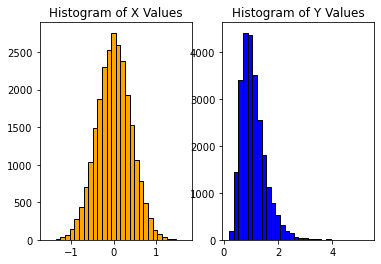

In [13]:
plt.subplot(1, 2, 1)
plt.figsize = [12,4]
plt.hist(X, edgecolor='k', color='orange', 
         bins=30)
plt.title('Histogram of X Values')

plt.subplot(1, 2, 2)
plt.figsize = [12,4]
plt.hist(Y, edgecolor='k', color='blue', 
         bins=30)
plt.title('Histogram of Y Values')
plt.show()

In [14]:
print(f'Probability that Y is less than 0.5: {np.round(np.mean(Y < .5),4)}')
print(f'Probability that Y is less than 1.0: {np.round(np.mean(Y < 1),4)}')
print(f'Probability that Y is less than 2.0: {np.round(np.mean(Y < 2),4)}')

Probability that Y is less than 0.5: 0.041
Probability that Y is less than 1.0: 0.4969
Probability that Y is less than 2.0: 0.9574


## Problem 6: Stochastic Linear Relationships

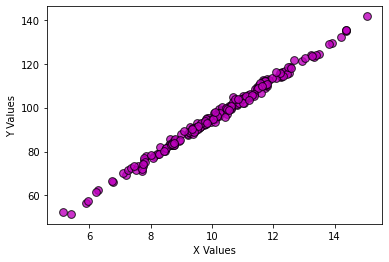

In [15]:
np.random.seed(1)
x_vals = np.random.normal(10, 2, 200)
errors = np.random.normal(0, 1.2, 200)
y_vals = 5.1 + 9. * x_vals + errors
plt.scatter(x=x_vals, y=y_vals, s=60, alpha=0.8, 
            color='m', edgecolor='black')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.figsize = [8,6]
plt.show()

In [16]:
diff_x = x_vals - np.mean(x_vals)
diff_y = y_vals - np.mean(y_vals)
numerator = np.sum(diff_x * diff_y)
denominator = (np.sum((diff_x ** 2)) * np.sum((diff_y ** 2))) ** 0.5
r = numerator / denominator
print(f'Correlation between X and Y: {np.round(r,4)}')

Correlation between X and Y: 0.9971


## Problem 7: Relationship between Life Expectancy and Per Capita GDP

In [17]:
import pandas as pd
df = pd.read_csv('gapminder_data.txt', sep='\t')
country = df.country.values
year = df.year.values
continent = df.continent.values
population = df.population.values
life_exp = df.life_exp.values
pcgdp = df.gdp_per_cap.values
gini = df.gini.values
df = None

In [18]:
continent_list =['africa', 'americas', 'asia', 'europe']
color_list = ['m', 'orange', 'c', 'g']

In [19]:
print(type(gini))

<class 'numpy.ndarray'>


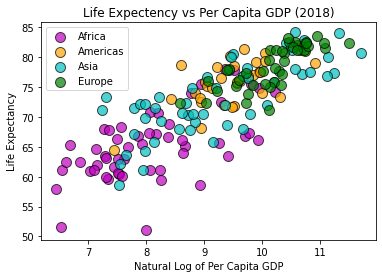

In [20]:
plt.figsze = [8,6]
for i in range(len(continent_list)):
    sel = (continent == continent_list[i]) & (year == 2018)
    plt.scatter(np.log(pcgdp[sel]),life_exp[sel], s=100, alpha=.7, edgecolor='k', color=color_list[i], label=continent_list[i].title())
plt.xlabel('Natural Log of Per Capita GDP')
plt.ylabel('Life Expectancy')
plt.title('Life Expectency vs Per Capita GDP (2018)')
plt.legend()
plt.show()

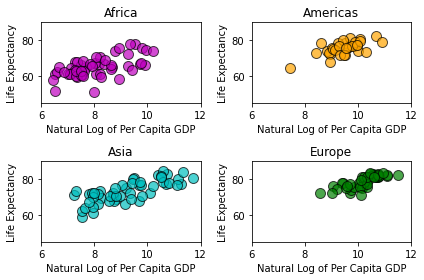

In [21]:
for i in range(len(continent_list)):
    plt.subplot(2,2,i+1)
    sel = (continent == continent_list[i]) & (year == 2018)
    figsize=[10,8]
    plt.xlim([6, 12])
    plt.ylim([45, 90])
    plt.scatter(np.log(pcgdp[sel]),life_exp[sel], s=100, alpha=.7, edgecolor='k', color=color_list[i])
    plt.title(continent_list[i].title())
    plt.xlabel('Natural Log of Per Capita GDP')
    plt.ylabel('Life Expectancy')
plt.tight_layout()
plt.show()

## Problem 8: Trends by Country

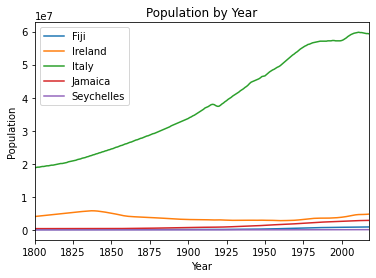

In [22]:
country_list = ['Fiji', 'Ireland', 'Italy', 'Jamaica', 'Seychelles']
for i in range(len(country_list)):
    sel = (country == country_list[i])
    plt.plot(year[sel], population[sel], label = country_list[i])
figsize=[8,4]
plt.xlim([1800, 2018])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population by Year')
plt.legend()
plt.show()

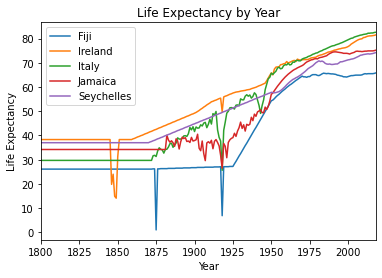

In [23]:
country_list = ['Fiji', 'Ireland', 'Italy', 'Jamaica', 'Seychelles']
for i in range(len(country_list)):
    sel = (country == country_list[i])
    plt.plot(year[sel], life_exp[sel], label = country_list[i])
figsize=[8,4]
plt.xlim([1800, 2018])
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy by Year')
plt.legend()
plt.show()